## Names : Sayak Mallick, Aayushi Ajmera
## Course : Masters in Quantitative Data Science Methods
## Matriculation Numbers : 6000578, 6001009

In [62]:
# importing all required modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
import ipywidgets as widgets 
from ipywidgets import *

import geopandas
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

In [2]:
# importing the data

terror = pd.read_excel(r"../data/globalterrorismdb_0221dist.xlsx")
dk = terror.copy()

DriverError: E:/University Tuebingen/Data Literacy/DL Project/dataset/World_Countries_(Generalized)/World_Countries__Generalized_.shp: No such file or directory

In [4]:
world_map = geopandas.read_file(r'../data/World_Countries__Generalized_.shp')
capitals = pd.read_csv(r'../data/concap.csv')
happiness2015 = pd.read_csv("../data/2015.csv")
happiness2016 = pd.read_csv("../data/2016.csv")
happiness2017 = pd.read_csv("../data/2017.csv")
happiness2018 = pd.read_csv("../data/2018.csv")
happiness2019 = pd.read_csv("../data/2019.csv")

# Data Preprocessing

In [5]:
df = dk

df['ncasualties'] = df['nkill'] + df['nwound']
df['has_casualties'] = df['ncasualties'].apply(lambda x: 0 if x == 0 else 1)

In [6]:
years = [2015,2016,2017,2018,2019]
terror_snip = terror[terror['iyear'].isin(years)]
terror_new = terror_snip

In [7]:
terror_new["Rank"] = ""
terror_new["Score"] = ""
terror_new = terror_new.rename(columns={'country_txt': 'Country'})
happiness2015 = happiness2015.rename(columns={'Happiness Score' : 'Score_2015'})
happiness2016 = happiness2016.rename(columns={'Happiness Score' : 'Score_2016'})
happiness2017 = happiness2017.rename(columns={'Happiness.Score' : 'Score_2017'})
happiness2018 = happiness2018.rename(columns={'Country or region' : 'Country', 'Score' : 'Score_2018'})
happiness2019 = happiness2019.rename(columns={'Country or region' : 'Country', 'Score' : 'Score_2019'})

# Visualizing the data

Text(0, 0.5, 'No. of attacks')

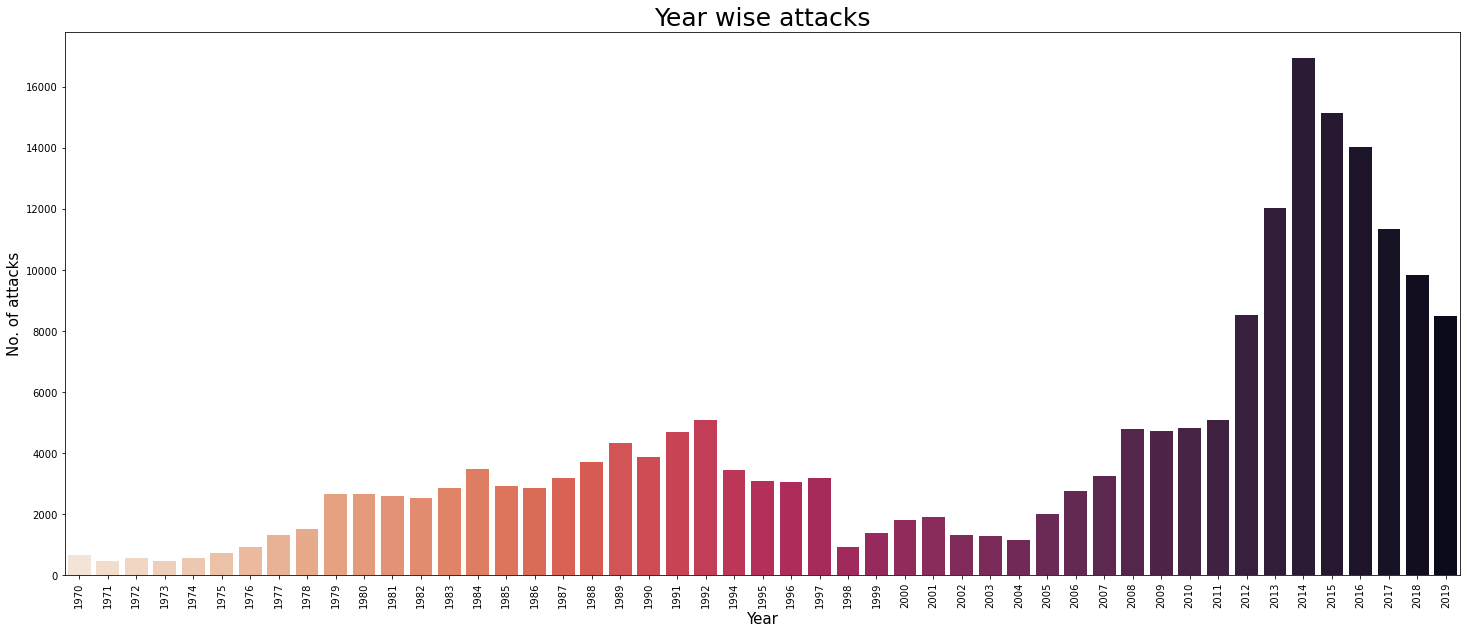

In [8]:
plt.figure(figsize=(25,10))
sns.countplot(terror['iyear'], palette="rocket_r").set_title('Year wise attacks', fontsize=25)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=15)
plt.ylabel('No. of attacks', fontsize=15)

Text(0.5, 1.0, 'Incidents')

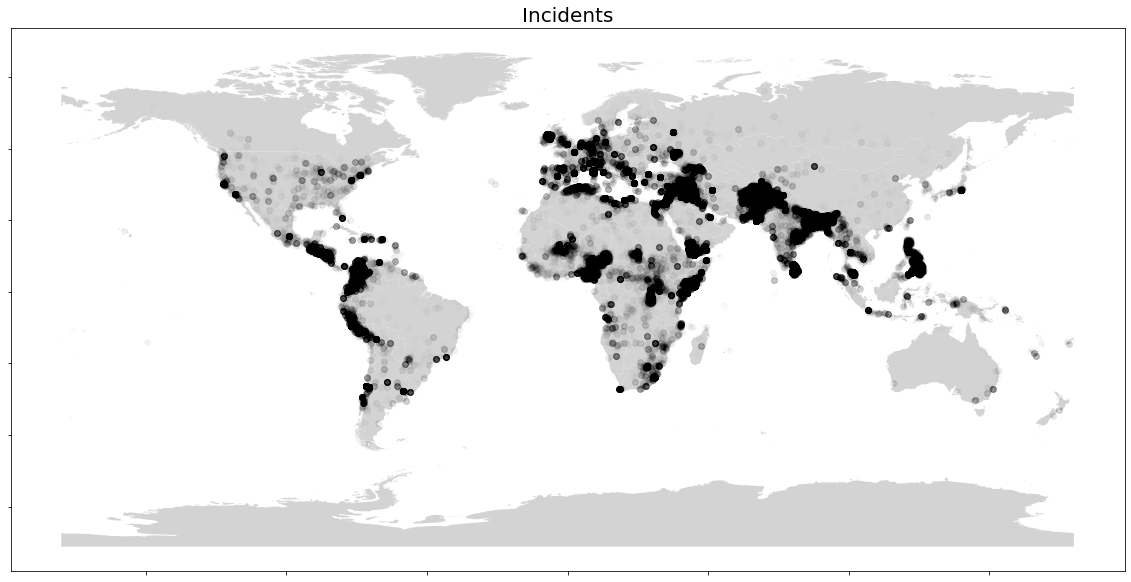

In [9]:
#Terrorist incident locations plotted

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
total_inc = geopandas.GeoDataFrame(df, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize = (20,10))
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
total_inc.plot(ax=ax, alpha= 0.01, color = 'k')
ax.set_title('Incidents',fontsize = 20)

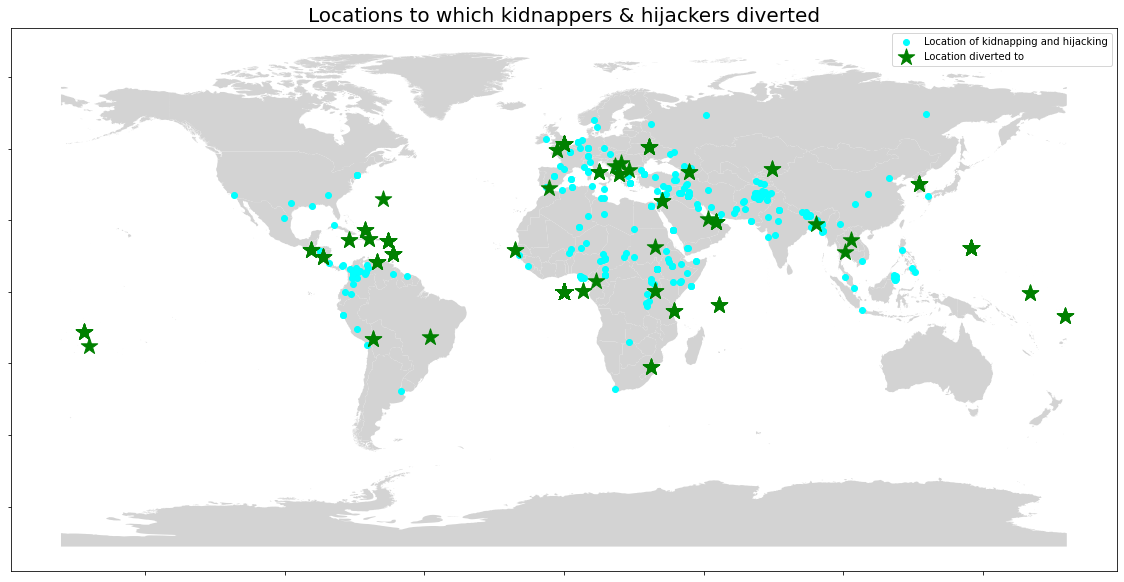

In [10]:
#Estimated global terrorist hubs based on country to which kidnappers diverted

crs = {'init':'EPSG:4326'}

div = df[pd.notna(df['divert'])]
div_cap = div.copy()
div_cap['Diverted to capital'] = div_cap['divert'].map (dict(zip(div_cap.country_txt,capitals.CapitalName)))
div_cap['CapLong'] = div_cap['Diverted to capital'].map (dict(zip(div_cap['Diverted to capital'],capitals.CapitalLongitude)))
div_cap['CapLat'] = div_cap['Diverted to capital'].map (dict(zip(div_cap['Diverted to capital'],capitals.CapitalLatitude)))

geometry = [Point(xy) for xy in zip(div['longitude'], div['latitude'])]
cap_geometry = [Point(xy) for xy in zip(div_cap['CapLong'], div_cap['CapLat'])]

div = geopandas.GeoDataFrame(div, crs = crs, geometry = geometry)
div_cap = geopandas.GeoDataFrame(div_cap, crs = crs, geometry = cap_geometry)

fig, ax = plt.subplots(figsize = (20,10))
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
div.plot(ax=ax, alpha= 1, color = 'cyan', label = 'Location of kidnapping and hijacking', legend = True)
div_cap.plot(ax=ax, alpha = 1, color = 'green', marker = '*', markersize = 300,label = 'Location diverted to', legend = True)
ax.legend(labels = ['Location of kidnapping and hijacking', 'Location diverted to'])
ax.set_title('Locations to which kidnappers & hijackers diverted',fontsize = 20)
plt.show()

# Economic Influence

Text(0.5, 1.0, 'Incidents for which property damage was above 1 million dollars')

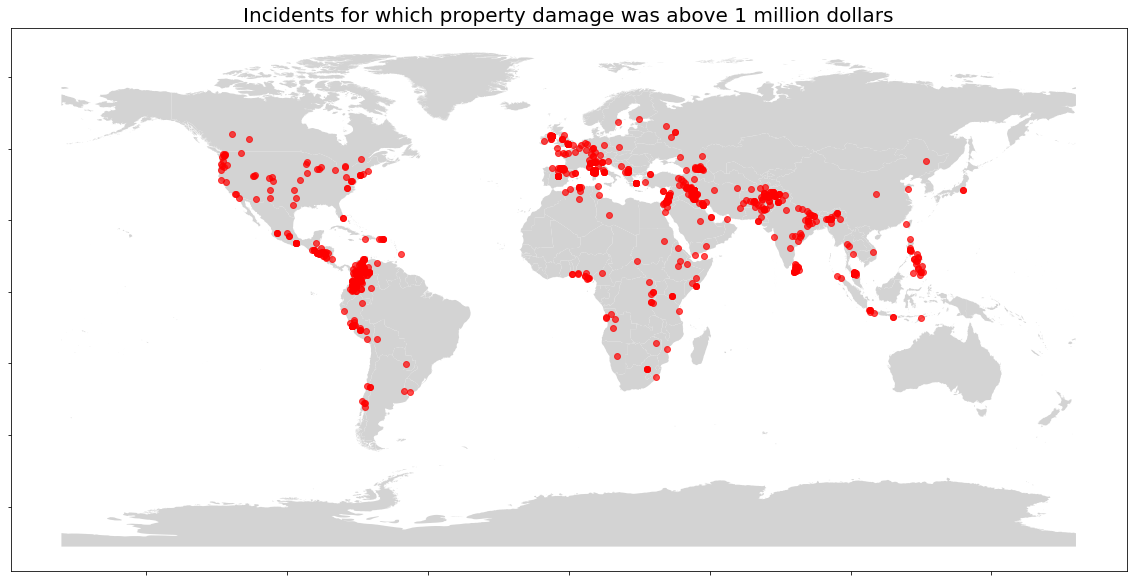

In [11]:
#Terrorist incident locations plotted for which property damage was above 1 million dollars

catas_inc = df[df['propextent'].isin([1,2])]
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(catas_inc['longitude'], catas_inc['latitude'])]
catas_inc = geopandas.GeoDataFrame(catas_inc, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize = (20,10))
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
catas_inc.plot(ax=ax, alpha= 0.7, color = 'red')
ax.set_title('Incidents for which property damage was above 1 million dollars',fontsize = 20)

# Social Influence

In [12]:
attacks = terror_new.groupby('Country').count()['eventid']
attacks = pd.DataFrame(attacks)
attacks = attacks.rename(columns={'eventid':'Incidents'})
attacks

,Incidents
Country,
Afghanistan,8539
Albania,8
Algeria,45
Angola,9
Argentina,12
...,...
West Bank and Gaza Strip,701
Western Sahara,2
Yemen,3534


In [13]:
hpterror15 = dict(zip(happiness2015.Country,happiness2015.Score_2015))
hpterror16 = dict(zip(happiness2016.Country,happiness2016.Score_2016))
hpterror17 = dict(zip(happiness2017.Country,happiness2017.Score_2017))
hpterror18 = dict(zip(happiness2018.Country,happiness2018.Score_2018))
hpterror19 = dict(zip(happiness2019.Country,happiness2019.Score_2019))

In [14]:
attacks['score_2015'] = attacks.index.map(hpterror15)
attacks['score_2016'] = attacks.index.map(hpterror16)
attacks['score_2017'] = attacks.index.map(hpterror17)
attacks['score_2018'] = attacks.index.map(hpterror18)
attacks['score_2019'] = attacks.index.map(hpterror19)

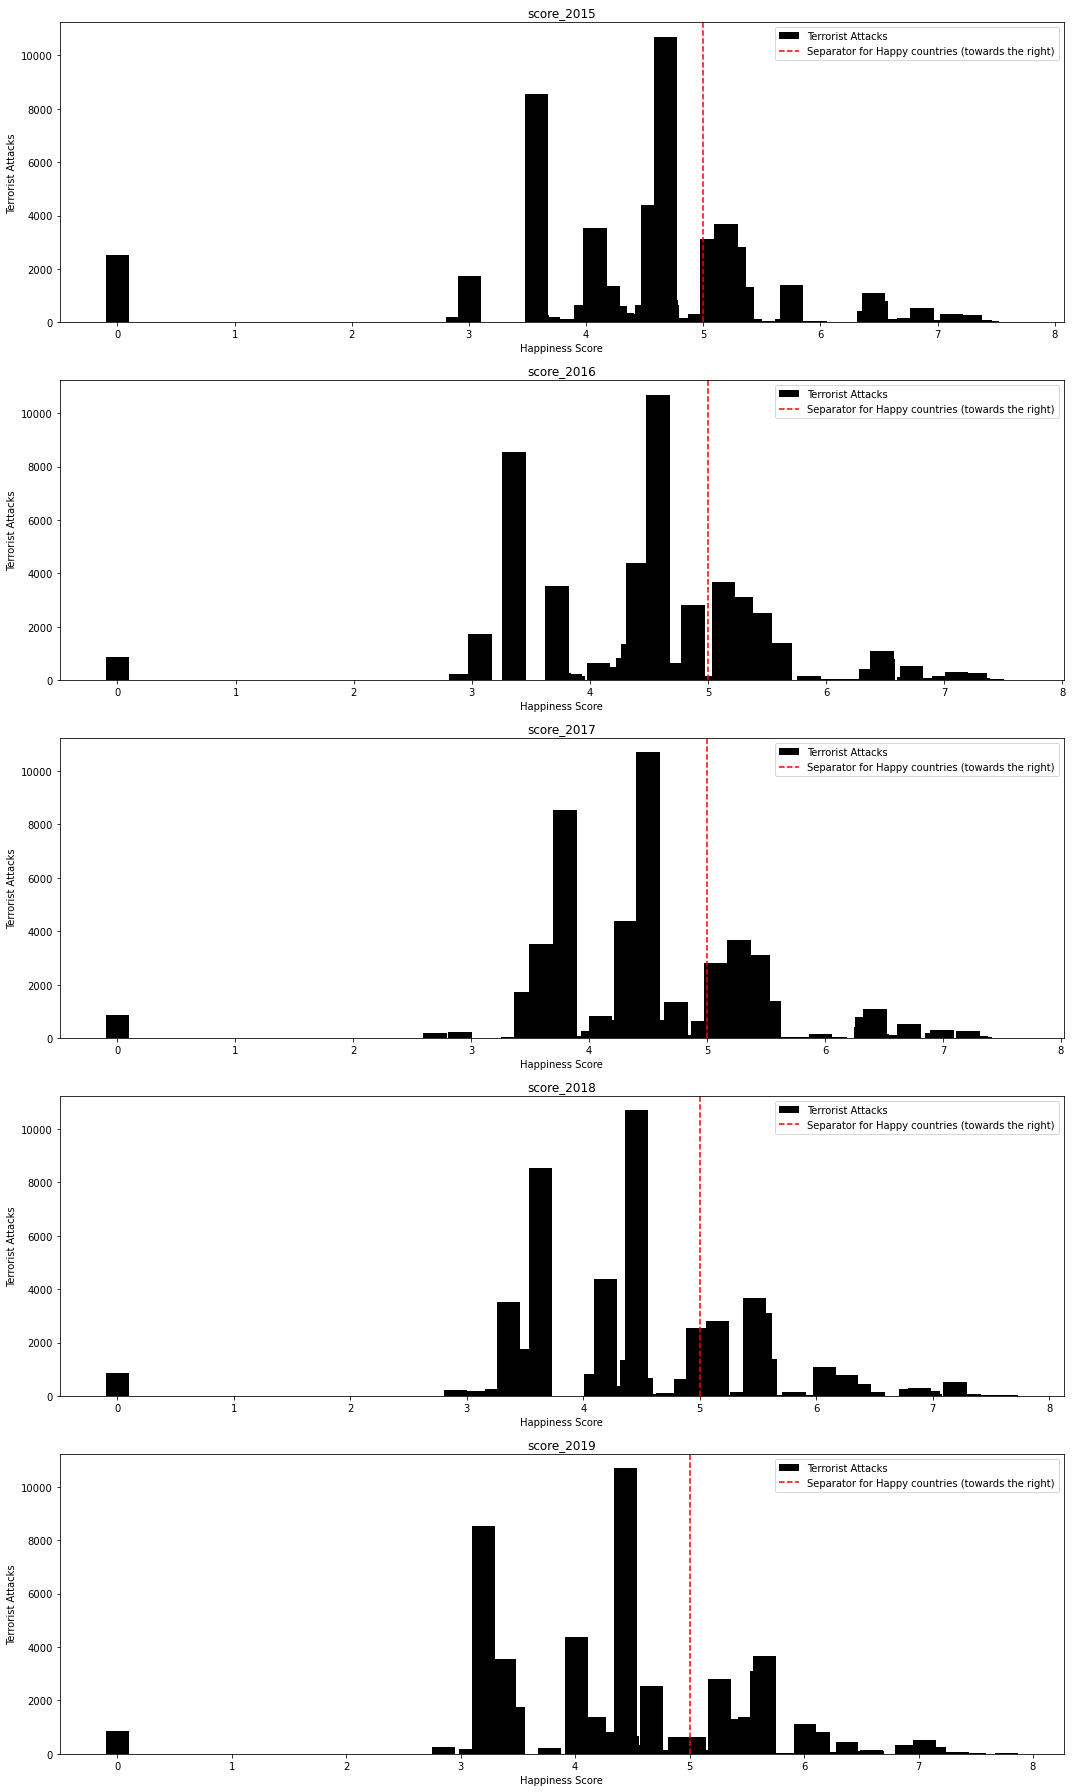

In [44]:
fig, ax = plt.subplots(5, figsize = (15,25))
attacks = attacks.fillna(0)

lp = ['score_2015','score_2016','score_2017','score_2018','score_2019']
for k in range(len(lp)):
    attacks.sort_values (by = lp[k],ascending = False, inplace = True)
    y = attacks.Incidents
    x = attacks[lp[k]]

    a = ax[k].bar(x, y, color='black', width = 0.2);
    b = ax[k].axvline(5,color = 'r', linestyle = '--')
    ax[k].set_xlabel('Happiness Score')
    ax[k].set_ylabel('Terrorist Attacks')
    ax[k].legend(handles =[a,b],labels=['Terrorist Attacks','Separator for Happy countries (towards the right)'])
    ax[k].set_title(lp[k])

fig.tight_layout()
plt.show()

# Prediction of casualties

In [45]:
feature_cols = ['iyear', 'imonth', 'iday', 'latitude', 'longitude','extended','vicinity','doubtterr','multiple','success',
                'suicide','claimed','property','ishostkid','country_txt','region','attacktype1_txt','targtype1_txt','weaptype1_txt']

In [46]:
target_col = 'has_casualties'

In [47]:
lb = LabelEncoder()
df['country_txt'] = lb.fit_transform(df['country_txt'])
df['attacktype1_txt'] = lb.fit_transform(df['attacktype1_txt'])
df['targtype1_txt'] = lb.fit_transform(df['targtype1_txt'])
df['weaptype1_txt'] = lb.fit_transform(df['weaptype1_txt'])

In [48]:
X = df[feature_cols].fillna(0)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
forest = ExtraTreesClassifier(n_estimators=20, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

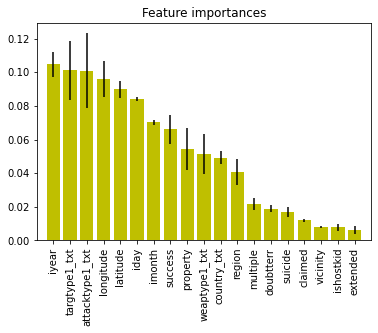

In [50]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [51]:
feature_cols = ['longitude', 'targtype1_txt', 'latitude', 'attacktype1_txt', 'property', 'iday', 'imonth']
X = df[feature_cols].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.mean(y_pred == y_test)

0.8211415789909701

In [53]:
model = RandomForestClassifier(n_estimators=20)

scores = cross_val_score(model, X, y, cv=10) # Ten-fold cross validation.
print(scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

[0.69228093 0.74233312 0.71052239 0.72189084 0.77651854 0.76086092
 0.75275872 0.76245154 0.78193657 0.79366736]
Accuracy: 0.75 (+/- 0.06)


In [54]:
model = DummyClassifier(strategy="most_frequent")
%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)
np.mean(y_pred == y_test)

Wall time: 10.4 ms
Wall time: 0 ns


0.659183166266258

In [55]:
model = AdaBoostClassifier(n_estimators=20)

scores = cross_val_score(model, X, y, cv=10) # Ten-fold cross validation.
print(scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

[0.69163477 0.76643968 0.77235449 0.78983994 0.78129039 0.80186897
 0.75956855 0.78009743 0.77288995 0.79043643]
Accuracy: 0.77 (+/- 0.06)


In [56]:
model = GradientBoostingClassifier(n_estimators=20)

scores = cross_val_score(model, X, y, cv=10) # Ten-fold cross validation.
print(scores)
print('Accuracy: %0.2f (+/- %+0.2f)' % (scores.mean(), scores.std() * 2))

[0.70739102 0.76489885 0.76822904 0.77746297 0.79143056 0.73073864
 0.7414753  0.76488717 0.78173775 0.77979918]
Accuracy: 0.76 (+/- +0.05)


# K means clustering to group nearby incidents

In [57]:
# removing outliers - incidents where a lot of people were killed/ injured
data = dk[dk['nkill'] <= 8].reset_index(drop=True)
data = data[data['nwound'] <= 12].reset_index(drop=True)

In [58]:
fts = ['longitude','latitude','nwound','nkill','natlty1_txt','targtype1_txt','targsubtype1_txt',
            'weaptype1_txt','attacktype1_txt']

X = pd.get_dummies(data[fts])
X = X.T[X.var() > 0.05].T.fillna(0)
X = X.fillna(0)

print('Shape :', X.shape)
X.head()

Shape : (166580, 13)


,longitude,latitude,nwound,nkill,targtype1_txt,weaptype1_txt,attacktype1_txt,natlty1_txt_Afghanistan,natlty1_txt_India,natlty1_txt_Iraq,natlty1_txt_Pakistan,targsubtype1_txt_Police Security Forces/Officers,targsubtype1_txt_Unnamed Civilian/Unspecified
0,-69.951164,18.456792,0.0,1.0,13.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-99.086624,19.371887,0.0,0.0,5.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,120.599741,15.478598,0.0,1.0,7.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-89.176269,37.005105,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-56.187214,-34.891151,0.0,0.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


2, 3, 4, 5, 6, 7, 8, 9, 10, 

<AxesSubplot:>

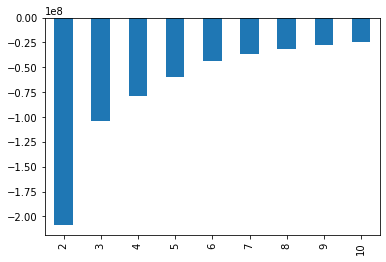

In [63]:
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(X).score(X)
pd.Series(scores).plot.bar()

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
data['Cluster'] = KMeans(n_clusters=6).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, data['Cluster'], sample_size=10000) * 10000 // 1 / 100, '%')

Silhouette Score: 53.03 %


In [65]:
names = data.groupby('Cluster')['region_txt'].describe()['top'].values
data['ClusterName'] = data['Cluster'].apply(lambda c: names[c - 1])

numerical = data.dtypes[data.dtypes != 'object'].keys()
exclude = [
    'eventid', 'Cluster', 'region', 'country', 'iyear', 
    'natlty1', 'natlty2', 'natlty3', 'imonth', 'iday',
    'guncertain1', 'guncertain2', 'guncertain3'
] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]
X_profiling = data[numerical.drop(exclude)].fillna(0)

X_profiling['ClusterName'] = data['ClusterName']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

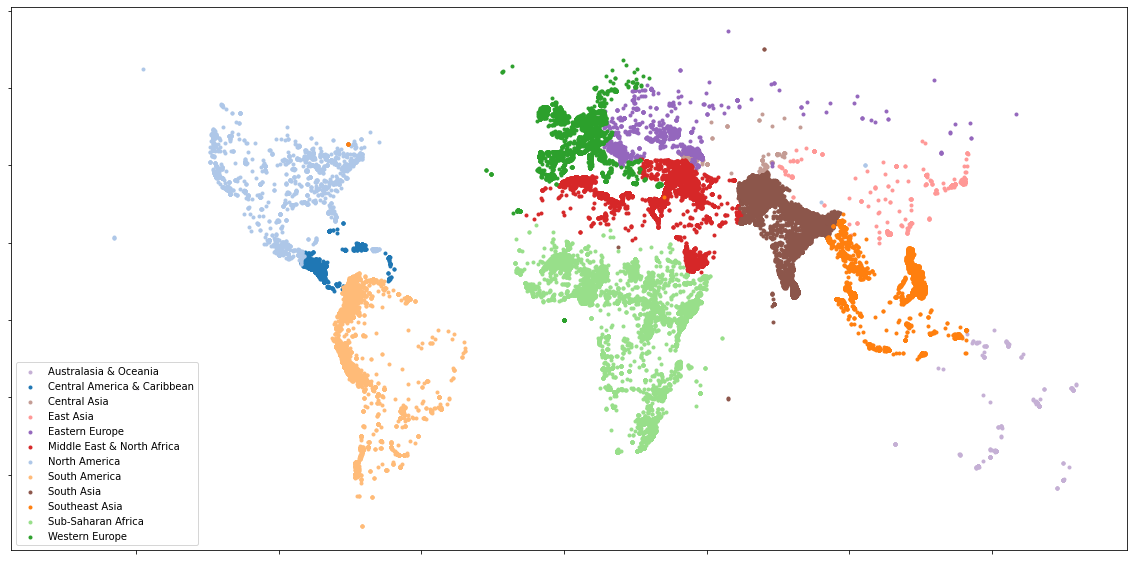

In [66]:
ckeys = data['region_txt'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab20(range(len(ckeys)))))

fig,ax = plt.subplots(1,figsize = (20,10))
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
for i, x in pd.concat([X_profiling, data['region_txt']], axis=1).groupby('region_txt'):
    a = ax.scatter(x['longitude'], x['latitude'], c=ckeys[i], marker='.', cmap='tab10', label=i)
plt.legend(loc=3)

In [67]:
print('Similarity between cluster and region labels:', 
      len(data[data['region_txt'] == data['ClusterName']]) / len(data) * 10000 // 1 / 100, '%')

Similarity between cluster and region labels: 84.66 %


# Extras

In [68]:
def plotf(Year):
    dataperyear= terror.loc[terror['iyear']==Year]
    region = dataperyear['region_txt'].unique()
    
    attacks = dataperyear['region_txt'].value_counts()
    fig = plt.figure(figsize =(13, 13))
    plt.pie(attacks)
    plt.legend(region)
    fig.tight_layout()
interactive_plot = interact(
    plotf,
    Year = widgets.IntSlider(min = 1970,max = 2019,step = 10, value = 2019)
)

interactive_plot

interactive(children=(IntSlider(value=2019, description='Year', max=2019, min=1970, step=10), Output()), _dom_…

<function __main__.plotf(Year)>

In [69]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,ncasualties,has_casualties,geometry
0,197000000001,1970,7,2,NaN,0,NaT,58,47,2,...,NaN,PGIS,0,0,0,0,NaN,1.0,1,POINT (-69.95116 18.45679)
1,197000000002,1970,0,0,NaN,0,NaT,130,116,1,...,NaN,PGIS,0,1,1,1,NaN,0.0,0,POINT (-99.08662 19.37189)
2,197001000001,1970,1,0,NaN,0,NaT,160,140,5,...,NaN,PGIS,-9,-9,1,1,NaN,1.0,1,POINT (120.59974 15.47860)
3,197001000002,1970,1,0,NaN,0,NaT,78,68,8,...,NaN,PGIS,-9,-9,1,1,NaN,NaN,1,POINT (23.76273 37.99749)
4,197001000003,1970,1,0,NaN,0,NaT,101,90,4,...,NaN,PGIS,-9,-9,1,1,NaN,NaN,1,POINT (130.39636 33.58041)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,201912310028,2019,12,31,"December 31, 2019",0,NaT,95,84,10,...,NaN,START Primary Collection,-9,-9,0,-9,NaN,0.0,0,POINT (44.37177 33.30357)
201179,201912310030,2019,12,31,NaN,0,NaT,195,170,11,...,NaN,START Primary Collection,-9,-9,0,-9,NaN,3.0,1,POINT (22.44173 13.44089)
201180,201912310031,2019,12,31,"December 31, 2019",0,NaT,195,170,11,...,NaN,START Primary Collection,-9,-9,0,-9,NaN,2.0,1,POINT (22.44173 13.44089)
201181,201912310032,2019,12,31,NaN,0,NaT,92,80,6,...,NaN,START Primary Collection,-9,-9,0,-9,NaN,1.0,1,POINT (74.09773 33.81279)


In [70]:
df.groupby('gname').count()['eventid'].sort_values(ascending = False)[1:11]

gname
Taliban                                             10094
Islamic State of Iraq and the Levant (ISIL)          6864
Shining Path (SL)                                    4563
Al-Shabaab                                           4126
Farabundo Marti National Liberation Front (FMLN)     3351
New People's Army (NPA)                              3249
Boko Haram                                           3018
Houthi extremists (Ansar Allah)                      2776
Irish Republican Army (IRA)                          2669
Kurdistan Workers' Party (PKK)                       2524
Name: eventid, dtype: int64

In [71]:
groups = list(df.groupby('gname').count()['eventid'].sort_values(ascending = False)[1:11].index)
groups

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Al-Shabaab',
 'Farabundo Marti National Liberation Front (FMLN)',
 "New People's Army (NPA)",
 'Boko Haram',
 'Houthi extremists (Ansar Allah)',
 'Irish Republican Army (IRA)',
 "Kurdistan Workers' Party (PKK)"]

In [72]:
g_dict = dict(zip(groups, sns.color_palette("bright", 10)))
g_dict

{'Taliban': (0.00784313725490196, 0.24313725490196078, 1.0),
 'Islamic State of Iraq and the Levant (ISIL)': (1.0,
  0.48627450980392156,
  0.0),
 'Shining Path (SL)': (0.10196078431372549,
  0.788235294117647,
  0.2196078431372549),
 'Al-Shabaab': (0.9098039215686274, 0.0, 0.043137254901960784),
 'Farabundo Marti National Liberation Front (FMLN)': (0.5450980392156862,
  0.16862745098039217,
  0.8862745098039215),
 "New People's Army (NPA)": (0.6235294117647059, 0.2823529411764706, 0.0),
 'Boko Haram': (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 'Houthi extremists (Ansar Allah)': (0.6392156862745098,
  0.6392156862745098,
  0.6392156862745098),
 'Irish Republican Army (IRA)': (1.0, 0.7686274509803922, 0.0),
 "Kurdistan Workers' Party (PKK)": (0.0, 0.8431372549019608, 1.0)}

Text(0.5, 1.0, 'Top 10 terror groups and their activites')

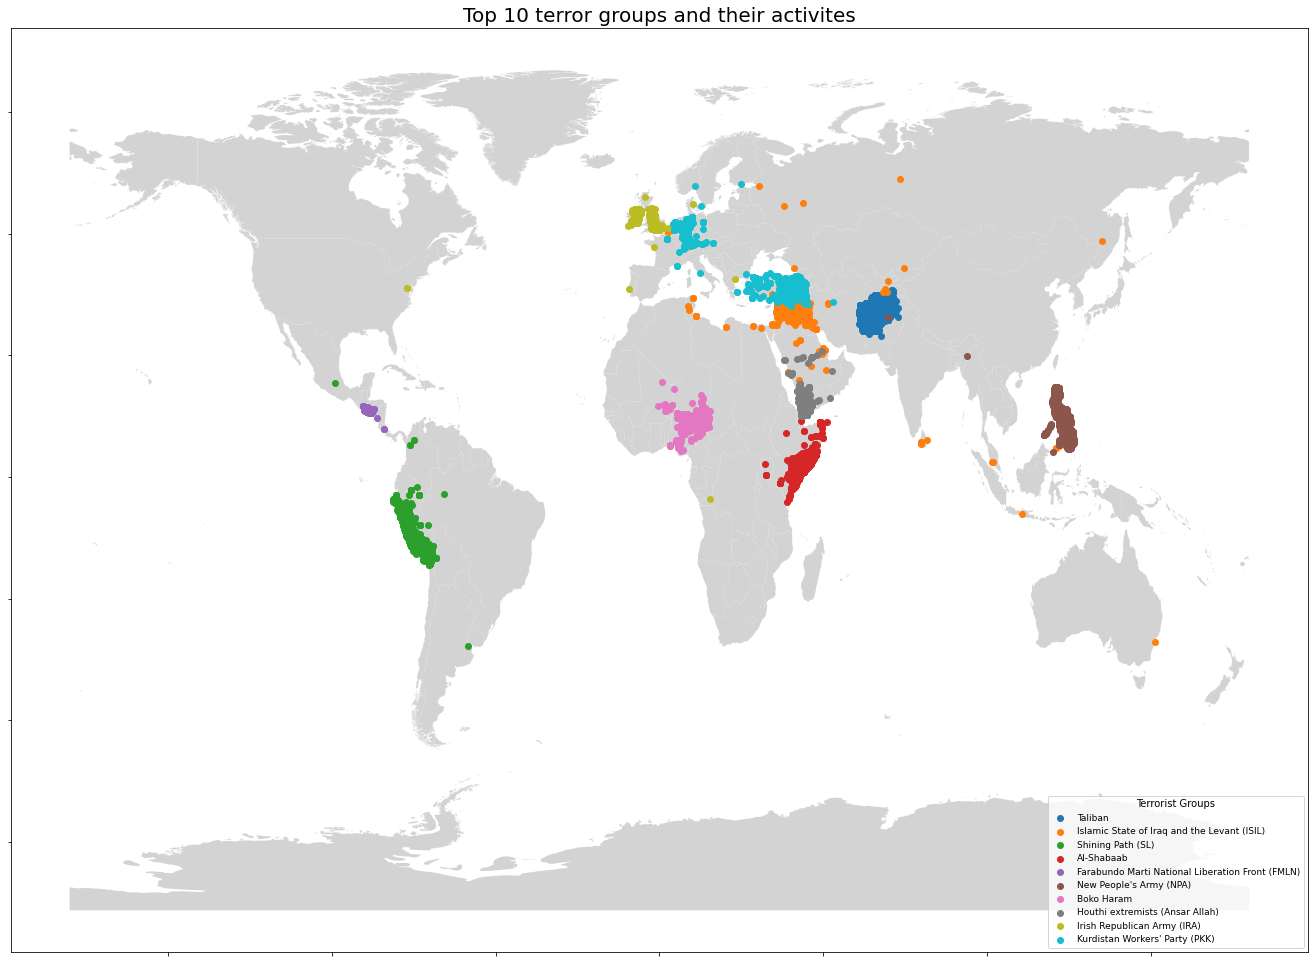

In [73]:
#Top 10 terrorist groups plotted by group

group_plot = df[df['gname'].isin(groups)]
group_plot['color'] = [g_dict[x] for x in group_plot.gname]

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(group_plot['longitude'], group_plot['latitude'])]
total_inc = geopandas.GeoDataFrame(group_plot, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize = (30,17))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

for c in range (10):
    tt = total_inc[total_inc['gname'] == groups[c]]
    tt.plot(ax=ax, alpha = 1, label = total_inc.gname)

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.legend(groups,title="Terrorist Groups", fontsize= 9 , title_fontsize=10, loc = 'lower right')
ax.set_title('Top 10 terror groups and their activites',fontsize = 20)